## Objectives
- Use different message types Human message and AI message
- Maintain a full conversation history using both message types
- use gpt 4o model using langchain chatopen AI
- create a sophisticated conversation loop

#### Main goal - create a agent with memory

In [1]:
!pip install langchain_groq langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 14.9 MB/s eta 0:00:00


In [2]:
from typing import TypedDict,List,Union
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,AIMessage

In [3]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api')

In [4]:
class Agentstate(TypedDict):
  message:List[Union["HumanMessage","AIMessage"]]

In [5]:
llm = ChatGroq(groq_api_key=groq_api_key,
               model_name="qwen-qwq-32b")

In [6]:
def chatbot(state:Agentstate)->Agentstate:
  response=llm.invoke(state['message'])
  state['message'].append(AIMessage(content=response.content))
  print(f"AI : {state['message']}")
  print(f"current_state  : {state['message']}")

  return state

In [7]:
graph=StateGraph(Agentstate)

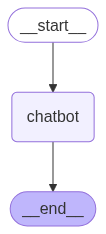

In [8]:
graph.add_node("chatbot",chatbot)
graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)
app=graph.compile()
graph.compile()

In [15]:
conversational_history=[]
user_input=input("Enter: ")

while user_input!="exit":
  conversational_history.append(HumanMessage(content=user_input))
  result=app.invoke({'message':conversational_history})
  # print(result['message'][-1].content.split("</think>")[-1].strip())
  conversational_history=result['message']
  user_input=input("Enter: ")

Enter: hi
AI : [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='\n<think>\nOkay, the user just said "hi". I should respond in a friendly way. Let me think of a simple greeting. Maybe "Hello! How can I assist you today?" That sounds good. It\'s welcoming and opens the door for them to ask for help. I should make sure there\'s no markdown, just plain text. Alright, that should work.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={})]
current_state  : [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='\n<think>\nOkay, the user just said "hi". I should respond in a friendly way. Let me think of a simple greeting. Maybe "Hello! How can I assist you today?" That sounds good. It\'s welcoming and opens the door for them to ask for help. I should make sure there\'s no markdown, just plain text. Alright, that should work.\n</think>\n\nHello! How can I assist you today?',

In [16]:
with open("me.txt",'w') as file:
  file.write("Your conversation Log:\n")
  for message in conversational_history:
    if isinstance(message,HumanMessage):
      file.write(f"Human: {message.content}\n")
    else:
      file.write(f"AI: {message.content}\n\n")
  file.write("End of Conversation")

print("Conversation saved to me.txt")

Conversation saved to me.txt
